In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import sr3

In [2]:
import sr3.noise_utils
from sr3.noise_utils import *

2021-12-05 15:09:56.554732: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


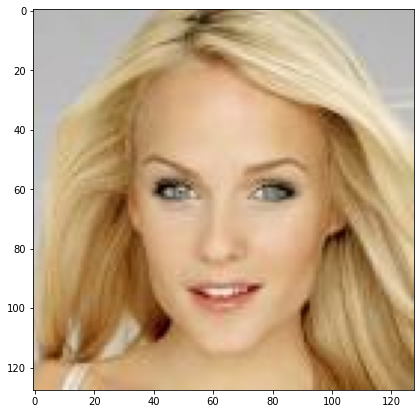

In [3]:
img = tf.io.decode_jpeg(tf.io.read_file("../resources/00002.jpg"))
img = tf.image.convert_image_dtype(img, tf.float32)
plt.figure(figsize=(7, 7))
plt.imshow(img.numpy())
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


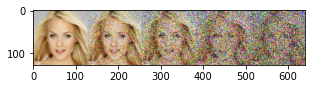

In [4]:
timesteps = 5
ncols = 5
def gallery(array, ncols=ncols):
    nindex, height, width, intensity = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols, intensity)
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, intensity))
    return result

schedule = noise_schedule('quad', 1, 0.8, timesteps, gammas=True)
noisy_imgs = [img]
for i in range(timesteps):
  noisy_img = generate_noisy_image(img, tf.cast(schedule[i], tf.float32))
  noisy_imgs.append(noisy_img)
noisy_imgs = np.array(noisy_imgs[1:])
plt.figure(figsize=(ncols * 3, timesteps // ncols))
plt.imshow(gallery(noisy_imgs))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


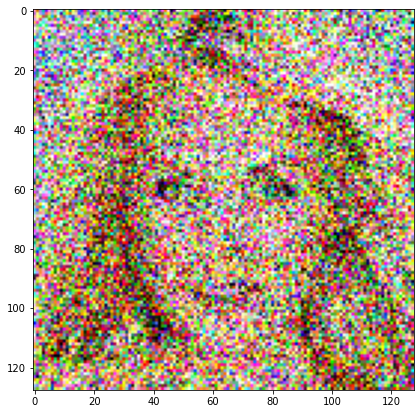

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


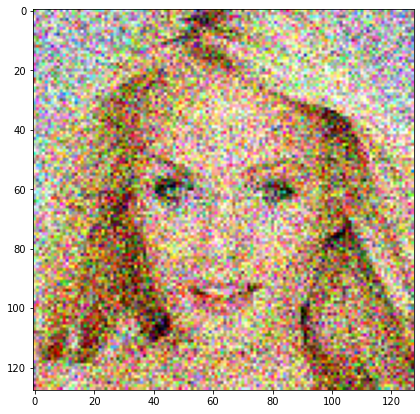

In [9]:
gamma_schedule = tf.cast(noise_schedule('quad', 1., 0.8, 5, gammas=True), tf.float32)
alpha_schedule = tf.cast(noise_schedule('quad', 1., 0.8, 5), tf.float32)
t = 2
noisy_img_t = generate_noisy_image(img, gamma_schedule[t])
plt.figure(figsize=(7, 7))
plt.imshow(noisy_img_t.numpy())
plt.show()
noisy_img_minus_one = generate_noisy_image(img, gamma_schedule[t-1])
plt.figure(figsize=(7, 7))
plt.imshow(noisy_img_minus_one.numpy())
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


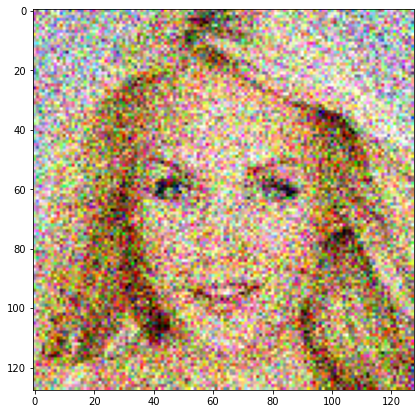

In [10]:
syn_minus_one = generate_noisy_image_minus_one_batch(
    tf.convert_to_tensor([img]),
    tf.convert_to_tensor([noisy_img_t]),
    tf.convert_to_tensor([gamma_schedule[t]]),
    tf.convert_to_tensor([gamma_schedule[t - 1]]),
    tf.convert_to_tensor([alpha_schedule[t]]))
syn_minus_one = tf.squeeze(syn_minus_one)
plt.figure(figsize=(7, 7))
plt.imshow(syn_minus_one.numpy())
plt.show()